<a href="https://colab.research.google.com/github/audreyemmely/computer-vision/blob/main/visaocomp_lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Resolução Lista 1**


---

ARQUIMEDES VINÍCIUS PEREIRA DE FRANÇA MOURA (impares)

AUDREY EMMELY RODRIGUES VASCONCELOS (pares)



## Instalação do opencv

In [1]:
#!pip install opencv-python

## Importando bibliotecas

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

## Importando assets

In [3]:
# image path 
path1 = 'https://user-images.githubusercontent.com/52829664/163676629-e6ba9f73-3115-4b8a-94de-42ad57632f9b.jpg'
path2 = 'https://user-images.githubusercontent.com/52829664/163676630-8ffbc9a0-de16-44d1-8120-4801a9ab5f7b.jpg'
path3 = 'https://user-images.githubusercontent.com/52829664/163676631-a0b3e8b6-2f84-4e5f-bd7f-759b635cda63.jpg'
path4 = 'https://user-images.githubusercontent.com/52829664/163676627-e9d549ee-a15c-4703-a8ed-b5c780d5975c.jpeg'
path5 = 'https://user-images.githubusercontent.com/52829664/163713134-8ef41a6f-ae48-4ea8-ae04-0de18ac0f763.png'
path6 = 'https://user-images.githubusercontent.com/52829664/163714305-0a5bdd70-c6cb-4cf3-b5b6-1abb4c17c7b5.jpg'
path7 = 'https://user-images.githubusercontent.com/52829664/163714218-19327e42-a4b7-4d87-8569-14bd086c7534.jpeg'

In [4]:
img1 = io.imread(path1)
img2 = io.imread(path2)
img3 = io.imread(path3)
img4 = io.imread(path4)
img5 = io.imread(path5)
img6 = io.imread(path6)
img7 = io.imread(path7)

## Questão 1

Implemente uma função que receba o tamanho n de um filtro espacial com dimensões n × n, e a matriz com os pesos do filtro, e aplique o
filtro numa imagem, gerando e salvando a imagem resultante no disco.

In [5]:
def spatialFilter(image, kernel, n=0):

    # Gather Shapes of Kernel + Image
    # We dont need to know the size of the img or kernel if we can get the shape
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape)) + 1)
    yOutput = int(((yImgShape - yKernShape)) + 1)
    output = np.zeros((xOutput, yOutput))

    # Iterate through image
    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        for x in range(image.shape[0]):
            if x > image.shape[0] - xKernShape:
                break
            output[x, y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
            
    return output

kernel = np.array([
          [0, 0,   0],
          [0, 0.5, 0],
          [0, 1, 0.5]])

dst = spatialFilter(img1,kernel)

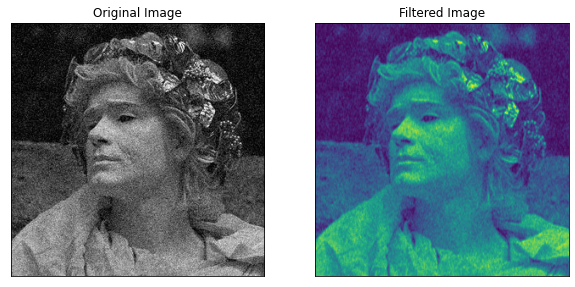

In [6]:
figure, axarr = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr[0].imshow(img1)
axarr[1].imshow(dst)
plt.sca(axarr[0]); plt.imshow(img1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr[1]); plt.imshow(dst); plt.title('Filtered Image'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 2

Implemente dois tipos de filtro para remoção de ruídos e aplique-os
em três imagens distintas.

Filtro 1 - Gaussian Filter

A filtragem Gaussiana fornece o método cv2.GaussianBlur() para desfocar uma imagem usando o Kernel Gaussiano. Cada pixel de uma imagem é multiplicado pelo Kernel Gaussiano. Isto significa que um Kernel gaussiano é uma matriz quadrada de pixels.

Filtro 2 - Bilateral Filter

A biblioteca OpenCV fornece a função cv2.bilateralFilter() para desfocar a imagem com um filtro bilateral. Esta função pode ser aplicada para reduzir o ruído, mantendo as bordas nítidas.

In [7]:
#Using Gaussian Filter
dst1 = cv2.GaussianBlur(img1,(5,5),cv2.BORDER_DEFAULT) 

dst2 = cv2.GaussianBlur(img2,(5,5),cv2.BORDER_DEFAULT) 

dst3 = cv2.GaussianBlur(img3,(5,5),cv2.BORDER_DEFAULT) 

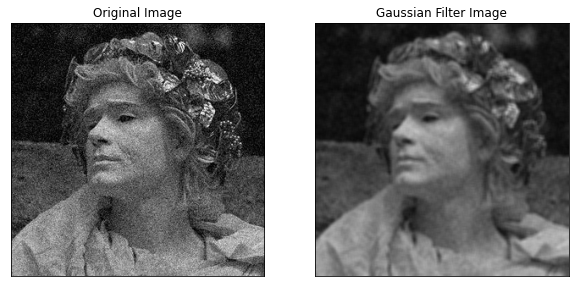

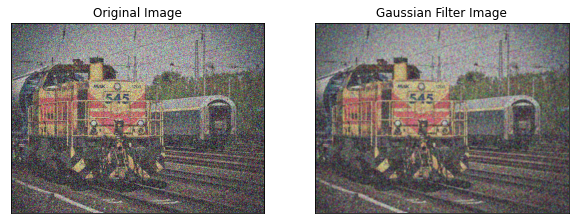

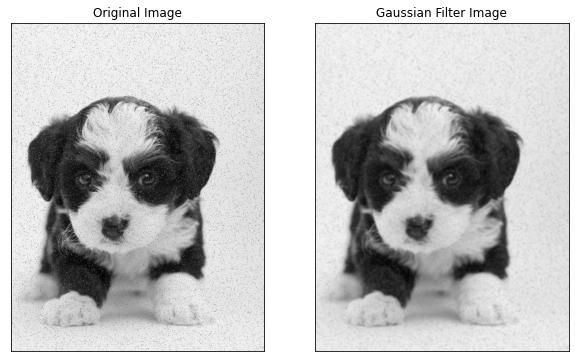

In [8]:
figure1, axarr1 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr1[0].imshow(img1)
axarr1[1].imshow(dst1)
plt.sca(axarr1[0]); plt.imshow(img1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr1[1]); plt.imshow(dst1); plt.title('Gaussian Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()
figure2, axarr2 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr2[0].imshow(img2)
axarr2[1].imshow(dst2)
plt.sca(axarr2[0]); plt.imshow(img2); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr2[1]); plt.imshow(dst2); plt.title('Gaussian Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()
figure3, axarr3 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr3[0].imshow(img3)
axarr3[1].imshow(dst3)
plt.sca(axarr3[0]); plt.imshow(img3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr3[1]); plt.imshow(dst3); plt.title('Gaussian Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

In [9]:
#Using Bilateral FIlter
dst4 = cv2.bilateralFilter(img1, 5, 10, 10)

dst5 = cv2.bilateralFilter(img2, 5, 10, 10)

dst6 = cv2.bilateralFilter(img3, 5, 10, 10)

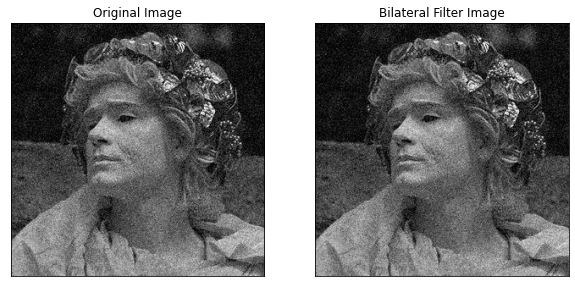

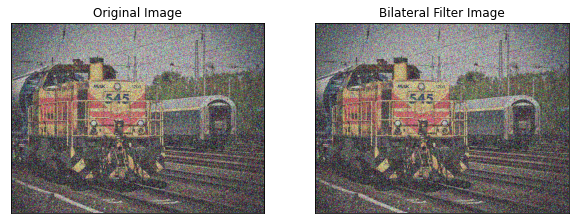

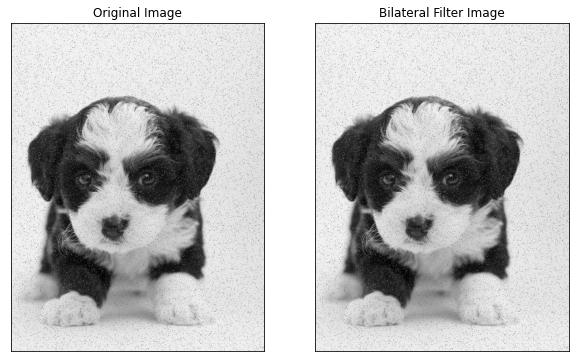

In [10]:
figure4, axarr4 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr4[0].imshow(img1)
axarr4[1].imshow(dst4)
plt.sca(axarr4[0]); plt.imshow(img1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr4[1]); plt.imshow(dst4); plt.title('Bilateral Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()
figure5, axarr5 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr5[0].imshow(img2)
axarr5[1].imshow(dst5)
plt.sca(axarr5[0]); plt.imshow(img2); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr5[1]); plt.imshow(dst5); plt.title('Bilateral Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()
figure6, axarr6 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr6[0].imshow(img3)
axarr6[1].imshow(dst6)
plt.sca(axarr6[0]); plt.imshow(img3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr6[1]); plt.imshow(dst6); plt.title('Bilateral Filter Image'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 3

Pesquise um filtro passa-alta e aplique-o em 3 imagens distintas,
variando o valor de n em 3 unidades em cada imagem. O que acontece
quando n cresce?

In [11]:
def highpass(image, dest, borderType, size=(0,0)):
  return cv2.Laplacian(image, dest, size, borderType = cv2.BORDER_DEFAULT)

In [12]:
imgcvt1 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
imgcvt2 = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)
imgcvt3 = cv2.cvtColor(img7, cv2.COLOR_BGR2RGB)

In [13]:
dst1 = highpass(imgcvt1, 2, borderType = cv2.BORDER_DEFAULT)
dst2 = highpass(imgcvt1, 5, borderType = cv2.BORDER_DEFAULT)
dst3 = highpass(imgcvt1, 8, borderType = cv2.BORDER_DEFAULT)

dst4 = highpass(imgcvt2, 2, borderType = cv2.BORDER_DEFAULT)
dst5 = highpass(imgcvt2, 3, borderType = cv2.BORDER_DEFAULT)
dst6 = highpass(imgcvt2, 6, borderType = cv2.BORDER_DEFAULT)

dst7 = highpass(imgcvt3, 5, borderType = cv2.BORDER_DEFAULT)
dst8 = highpass(imgcvt3, 8, borderType = cv2.BORDER_DEFAULT)
dst9 = highpass(imgcvt3, 11, borderType = cv2.BORDER_DEFAULT)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

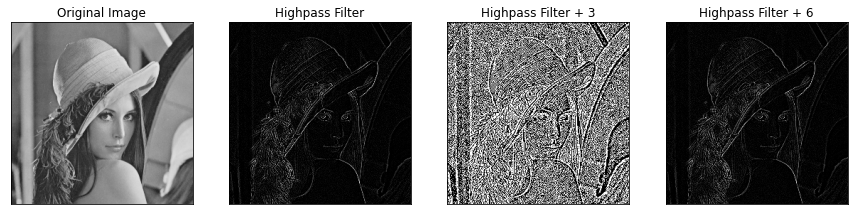

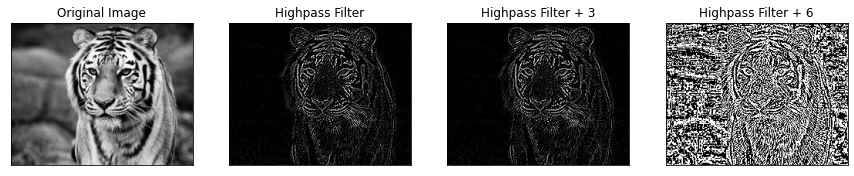

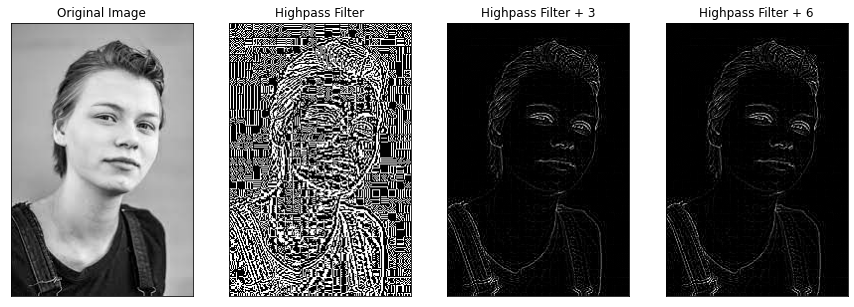

In [14]:
figure7, axarr7 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr7[0].imshow(imgcvt1)
axarr7[1].imshow(dst1)
axarr7[2].imshow(dst2)
axarr7[3].imshow(dst3)
plt.sca(axarr7[0]); plt.imshow(imgcvt1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr7[1]); plt.imshow(dst1); plt.title('Highpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr7[2]); plt.imshow(dst2); plt.title('Highpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr7[3]); plt.imshow(dst3); plt.title('Highpass Filter + 6'); plt.xticks([]); plt.yticks([])

figure8, axarr8 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr8[0].imshow(imgcvt2)
axarr8[1].imshow(dst4)
axarr8[2].imshow(dst5)
axarr8[3].imshow(dst6)
plt.sca(axarr8[0]); plt.imshow(imgcvt2); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr8[1]); plt.imshow(dst4); plt.title('Highpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr8[2]); plt.imshow(dst5); plt.title('Highpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr8[3]); plt.imshow(dst6); plt.title('Highpass Filter + 6'); plt.xticks([]); plt.yticks([])

figure9, axarr9 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr9[0].imshow(imgcvt3)
axarr9[1].imshow(dst7)
axarr9[2].imshow(dst8)
axarr9[3].imshow(dst9)
plt.sca(axarr9[0]); plt.imshow(imgcvt3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr9[1]); plt.imshow(dst7); plt.title('Highpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr9[2]); plt.imshow(dst8); plt.title('Highpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr9[3]); plt.imshow(dst9); plt.title('Highpass Filter + 6'); plt.xticks([]); plt.yticks([])

plt.show()

## Questão 4

Pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em cada imagem. O que acontece
quando n cresce?

In [15]:
def lowpass(image, sigma, size=(0,0)):
    return cv2.GaussianBlur(image, size, sigma)

dst10 = lowpass(img1, 3)
dst11 = lowpass(img1, 6)
dst12 = lowpass(img1, 9)

dst13 = lowpass(img2, 2)
dst14 = lowpass(img2, 5)
dst15 = lowpass(img2, 8)

dst16 = lowpass(img3, 4)
dst17 = lowpass(img3, 7)
dst18 = lowpass(img3, 10)


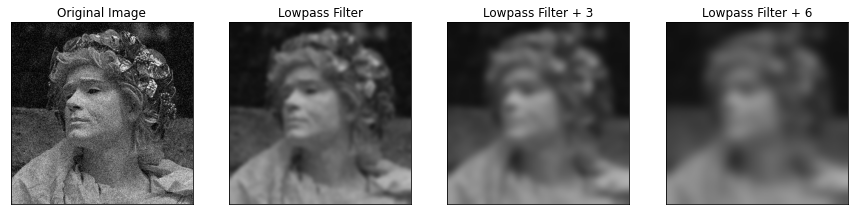

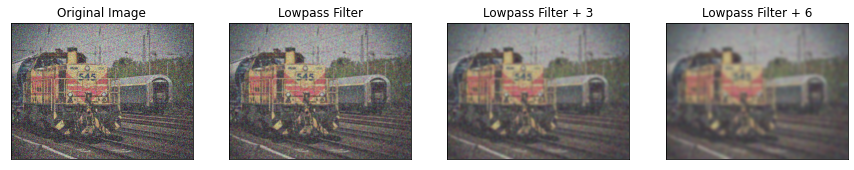

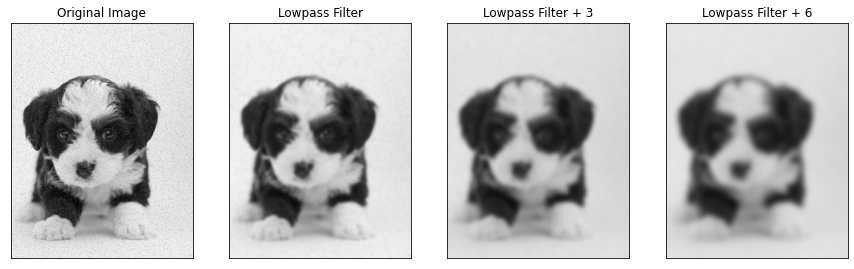

In [16]:
figure10, axarr10 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr10[0].imshow(img1)
axarr10[1].imshow(dst10)
axarr10[2].imshow(dst11)
axarr10[3].imshow(dst12)
plt.sca(axarr10[0]); plt.imshow(img1); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr10[1]); plt.imshow(dst10); plt.title('Lowpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr10[2]); plt.imshow(dst11); plt.title('Lowpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr10[3]); plt.imshow(dst12); plt.title('Lowpass Filter + 6'); plt.xticks([]); plt.yticks([])

figure11, axarr11 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr11[0].imshow(img2)
axarr11[1].imshow(dst13)
axarr11[2].imshow(dst14)
axarr11[3].imshow(dst15)
plt.sca(axarr11[0]); plt.imshow(img2); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr11[1]); plt.imshow(dst13); plt.title('Lowpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr11[2]); plt.imshow(dst14); plt.title('Lowpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr11[3]); plt.imshow(dst15); plt.title('Lowpass Filter + 6'); plt.xticks([]); plt.yticks([])

figure12, axarr12 = plt.subplots(nrows=1,ncols=4,figsize=(15, 15))
axarr12[0].imshow(img3)
axarr12[1].imshow(dst16)
axarr12[2].imshow(dst17)
axarr12[3].imshow(dst18)
plt.sca(axarr12[0]); plt.imshow(img3); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr12[1]); plt.imshow(dst16); plt.title('Lowpass Filter'); plt.xticks([]); plt.yticks([])
plt.sca(axarr12[2]); plt.imshow(dst17); plt.title('Lowpass Filter + 3'); plt.xticks([]); plt.yticks([])
plt.sca(axarr12[3]); plt.imshow(dst18); plt.title('Lowpass Filter + 6'); plt.xticks([]); plt.yticks([])

plt.show()

## Questão 5

Aplique o detector de canny usando a função Canny() do OpenCV
em uma ou mais imagens de sua escolha. Experimente variar os parâmetros
threshold1, threshold2 e apertureSize. Explique com suas palavras a influência de cada parâmetro no resultado.

In [17]:
threshold1 = 100  # Lower Threshold
threshold2 = 200  # Upper threshold
aperture_size = 5  # Aperture size
  
edge_without_apsize = cv2.Canny(img4, threshold1, threshold2)
edge_with_apsize = cv2.Canny(img4, threshold1, threshold2, apertureSize=aperture_size)

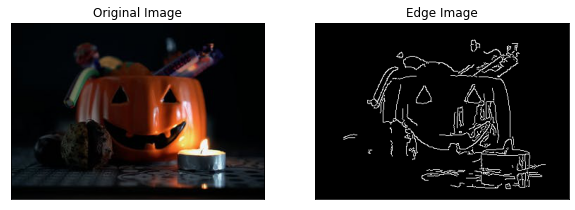

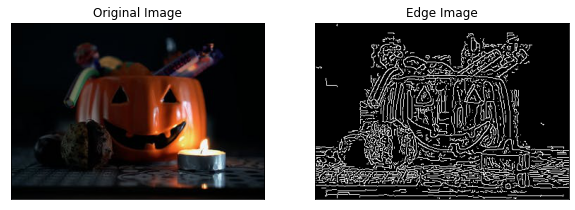

In [18]:
figure13, axarr13 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr13[0].imshow(img4)
axarr13[1].imshow(edge_without_apsize)
plt.sca(axarr13[0]); plt.imshow(img4); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr13[1]); plt.imshow(edge_without_apsize, cmap = 'gray'); plt.title('Edge Image'); plt.xticks([]); plt.yticks([])
plt.show()
figure14, axarr14 = plt.subplots(nrows=1,ncols=2,figsize=(10, 10))
axarr14[0].imshow(img4)
axarr14[1].imshow(edge_without_apsize)
plt.sca(axarr14[0]); plt.imshow(img4); plt.title('Original Image'); plt.xticks([]); plt.yticks([])
plt.sca(axarr14[1]); plt.imshow(edge_with_apsize, cmap = 'gray'); plt.title('Edge Image'); plt.xticks([]); plt.yticks([])
plt.show()

## Questão 6

Um filtro passa-baixa bastante conhecido é o filtro Gaussiano.
Através de uma máscara determinada por um desvio padrão σ, é possível
fazer o que chamamos de suavização gaussiana de uma imagem. Considere
o filtro 5x5 de desvio padrão unitário abaixo:

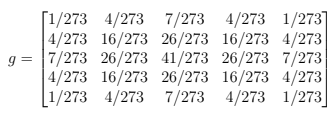

Crie uma imagem I de dimensões 100 × 100 que contém um único valor não nulo localizado no centro da imagem. Utilizando o filtro gaussiano
acima, calcule e exiba I ∗ g, onde ∗ é a notação para o operador de convolução.

## Questão 8

Implemente uma função que reduza um ou aumente a resolução da imagem por fatores (sx, sy). Você só pode usar o OpenCV para carregar a imagem. Se s < 1, implemente o algoritmo do slide 4. Se s > 1, use interpolação por vizinho mais próximo (slide 23). Aplique em três imagens distintas.

## Questão 9

Escolha uma imagem interessante e gere uma pirâmide aplicando sucessivamente downsampling 3 vezes com fator 1/2. Faça o mesmo com
uma pirâmide gaussiana e compare os resultados. Mostre os resultados de
cada pirâmide em uma única imagem lado a lado, como nos slides da aula
(vai exigir algumas operações de translação de imagens). Obs.: aqui você
pode usar funções do OpenCV.

In [19]:
from google.colab.patches import cv2_imshow

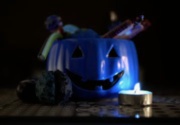

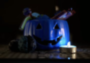

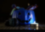

In [20]:
layer = img4.copy()
  
for i in range(4):
    layer = cv2.pyrDown(layer)
    cv2_imshow(layer)

## Questão 10

Usando as funções que você implementou, crie funções que apliquem filtros para calcular as imagens representando ∂f/∂x ,∂f/∂y e |∇f|. Implemente também as mesmas usando o operador de Sobel. Aplique-as diretamente em algumas imagens de sua escolha, e compare o efeito do ruído.

## Referências

[Python OpenCV Image Filtering](https://www.etutorialspoint.com/index.php/308-python-opencv-image-filtering)

[OpenCV: Smoothing Images](https://docs.opencv.org/4.x/dd/d6a/tutorial_js_filtering.html)

[Python OpenCV – Canny() Function](https://www.geeksforgeeks.org/python-opencv-canny-function/)